<a href="https://colab.research.google.com/github/vikashbhushan189/CODECRAFT_GA_02/blob/main/Stable_Diffusion_image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion 3:

**Date created:** 2025/20/02<br>
**Last modified:** --<br>
**Description:** Image generation using KerasHub's Stable Diffusion 3 model.

**Introduction:**
This notebook demonstrates image generation using the Stable Diffusion 3 model via KerasHub. The process includes loading the model, setting up inference parameters, and generating high-quality images based on textual prompts.

## **Implementation Overview:**

####**Environment Setup:**

- The necessary libraries are imported, including TensorFlow, Keras, and KerasHub.

- Dependencies are checked and installed if required.

####**Model Loading:**

- The Stable Diffusion 3 model is loaded from KerasHub.

- Model weights are downloaded and configured for inference.

####**Text-to-Image Generation:**

- A user-defined text prompt is passed to the model.

- The model processes the input and generates an image based on the provided prompt.

####**Display and Saving:**

- The generated image is displayed using Matplotlib.

- The image is saved locally for further use or analysis.


In [ ]:
# prompt: code for image_genereation using DALL-E mini



from diffusers import StableDiffusionPipeline
import torch

# Replace with your actual Hugging Face access token if needed
# You can find your token at https://huggingface.co/settings/tokens
access_token = "YOUR_HUGGING_FACE_ACCESS_TOKEN"

# Use a specific model ID or the default if you don't specify one
model_id = "CompVis/stable-diffusion-v1-4"  # or any other Stable Diffusion model ID

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_auth_token=access_token)
pipe = pipe.to("cuda") # Make sure you have a CUDA-enabled GPU

prompt = "A photo of an astronaut riding a horse on Mars"
image = pipe(prompt).images[0]
image.save("astronaut_horse.png")


# Display the image (optional, requires IPython)
try:
  from IPython.display import Image
  display(Image("astronaut_horse.png"))
except:
  print("Could not display image. Please check the 'astronaut_horse.png' file.")


In [ ]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install -Uq keras
!pip install -Uq git+https://github.com/keras-team/keras-hub.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.18.1 requires keras-hub==0.18.1, but you have keras-hub 0.19.0 which is incompatible.


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f6a1e858-80b0-9091-b16d-2ded13c5165e)


In [ ]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import time

import keras
import keras_hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
def display_generated_images(images):
    """Helper function to display the images from the inputs.

    This function accepts the following input formats:
    - 3D numpy array.
    - 4D numpy array: concatenated horizontally.
    - List of 3D numpy arrays: concatenated horizontally.
    """
    display_image = None
    if isinstance(images, np.ndarray):
        if images.ndim == 3:
            display_image = Image.fromarray(images)
        elif images.ndim == 4:
            concated_images = np.concatenate(list(images), axis=1)
            display_image = Image.fromarray(concated_images)
    elif isinstance(images, list):
        concated_images = np.concatenate(images, axis=1)
        display_image = Image.fromarray(concated_images)

    if display_image is None:
        raise ValueError("Unsupported input format.")

    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(display_image)
    plt.show()
    plt.close()



In [ ]:
backbone = keras_hub.models.StableDiffusion3Backbone.from_preset(
    "stable_diffusion_3_medium", image_shape=(512, 512, 3), dtype="float16"
)

In [ ]:
preprocessor = keras_hub.models.StableDiffusion3TextToImagePreprocessor.from_preset(
    "stable_diffusion_3_medium"
)
text_to_image = keras_hub.models.StableDiffusion3TextToImage(backbone, preprocessor)

Architecture of Stable Diffusion 3:

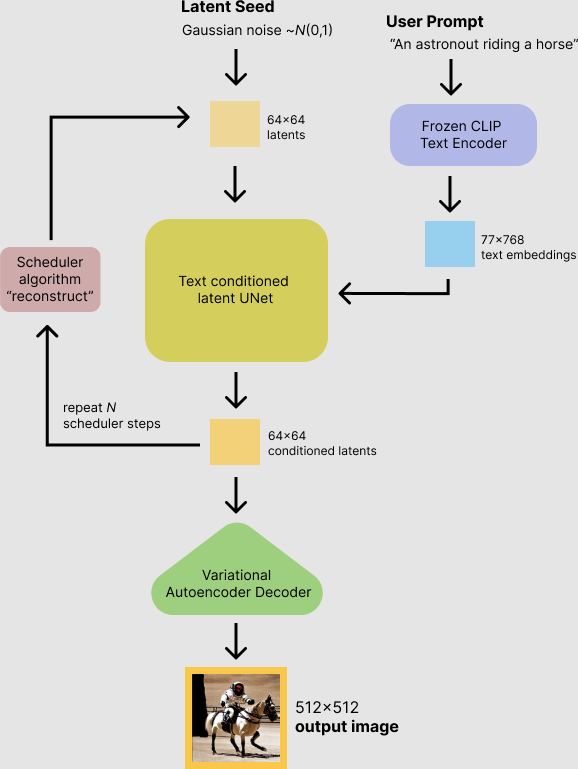

## **Text-to-image task**

Now we know the basis of the Stable Diffusion 3 and the text-to-image task.
Let's explore further using KerasHub APIs.

To use KerasHub's APIs for efficient batch processing, we can provide the model
with a list of prompts:

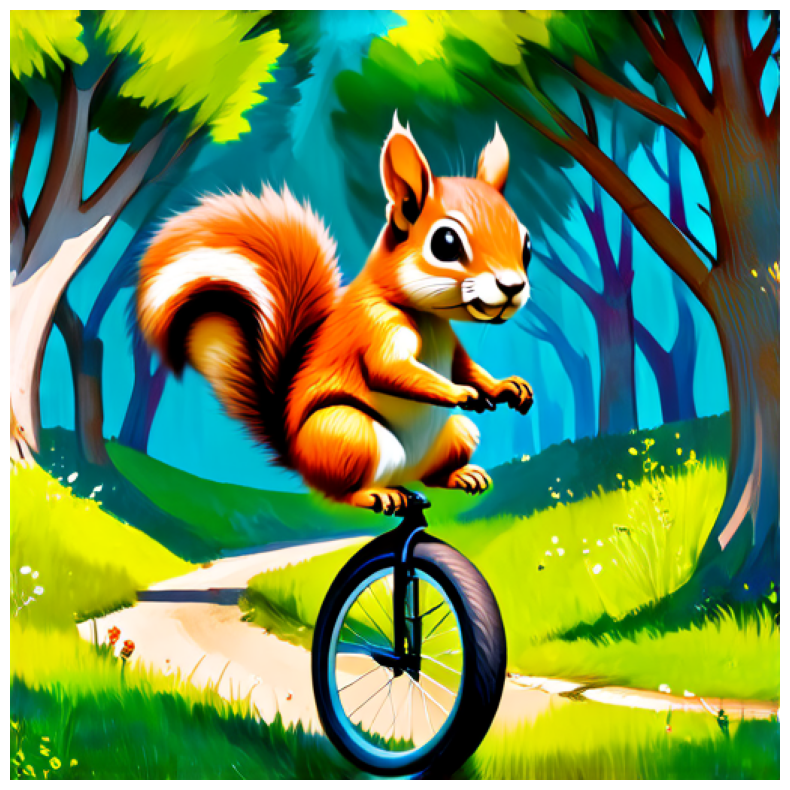

In [ ]:
prompt = "A painting of a squirrel riding a unicycle through a forest"

generated_image = text_to_image.generate(prompt)
display_generated_images(generated_image)




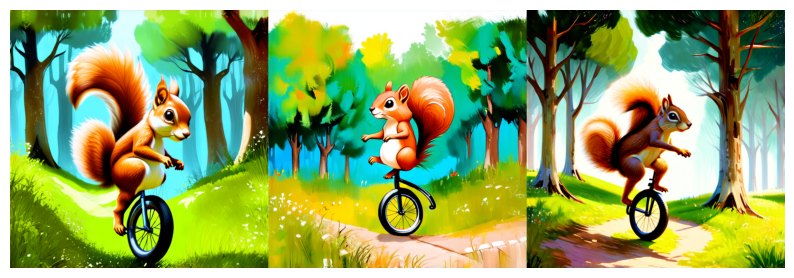

In [ ]:
generated_images = text_to_image.generate([prompt] * 3)
display_generated_images(generated_images)

Cost time (`num_steps=10`): 4.84s
Cost time (`num_steps=28`): 12.59s
Cost time (`num_steps=50`): 22.64s


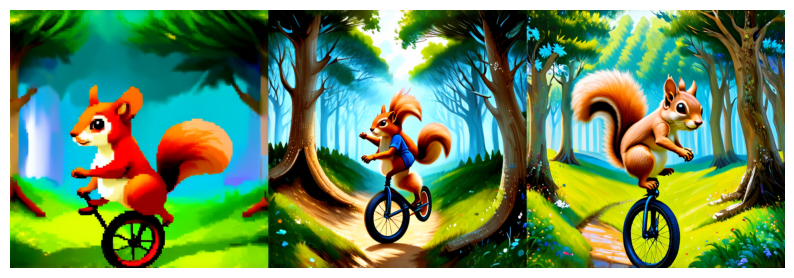

In [ ]:
num_steps = [10, 28, 50]
generated_images = []
for n in num_steps:
    st = time.time()
    generated_images.append(text_to_image.generate(prompt, num_steps=n))
    print(f"Cost time (`num_steps={n}`): {time.time() - st:.2f}s")

display_generated_images(generated_images)

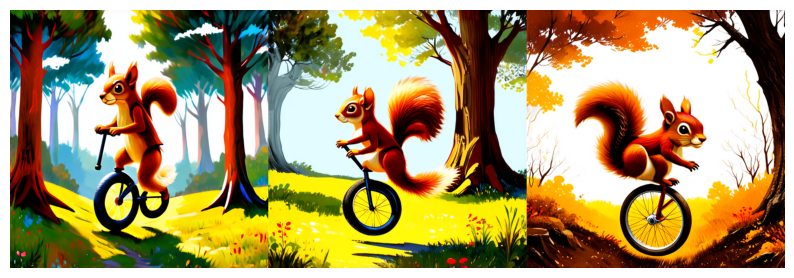

In [ ]:
generated_images = text_to_image.generate(
    {
        "prompts": [prompt] * 3,
        "negative_prompts": ["Green color"] * 3,
    }
)
display_generated_images(generated_images)

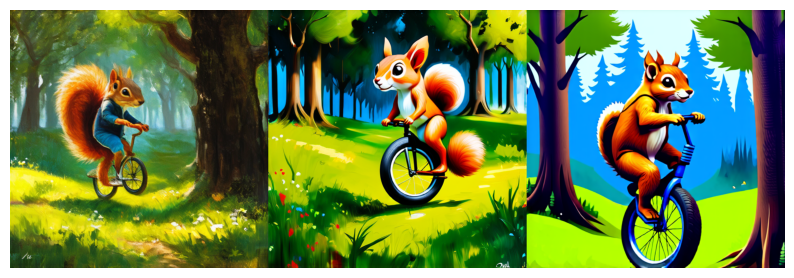

In [ ]:
generated_images = [
    text_to_image.generate(prompt, guidance_scale=2.5),
    text_to_image.generate(prompt, guidance_scale=7.0),
    text_to_image.generate(prompt, guidance_scale=10.5),
]
display_generated_images(generated_images)


### **Results and Observations:**

The generated images closely align with the provided prompts, demonstrating the model’s capability in realistic and creative image synthesis.

Performance varies depending on the complexity of the input prompt.



## Image-to-image task

A reference image can be used as a starting point for the diffusion process.
This requires an additional module in the pipeline: the encoder from the VAE
model.

The reference image is encoded by the VAE encoder into the latent space, where
noise is then added. The subsequent denoising steps follow the same procedure as
the text-to-image task.

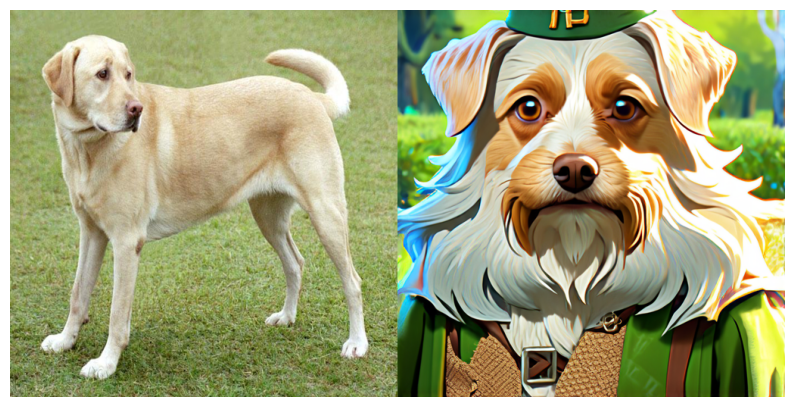

In [ ]:
image_to_image = keras_hub.models.StableDiffusion3ImageToImage(backbone, preprocessor)

image = Image.open("/content/YellowLabradorLooking_new.jpg").convert("RGB")
image = image.resize((512, 512))
width, height = image.size

# Note that the values of the image must be in the range of [-1.0, 1.0].
rescale = keras.layers.Rescaling(scale=1 / 127.5, offset=-1.0)
image_array = rescale(np.array(image))

prompt = "dog wizard, gandalf, lord of the rings, detailed, fantasy, cute, "
prompt += "adorable, Pixar, Disney, 8k"

generated_image = image_to_image.generate(
    {
        "images": image_array,
        "prompts": prompt,
    }
)
display_generated_images(
    [
        np.array(image),
        generated_image,
    ]
)

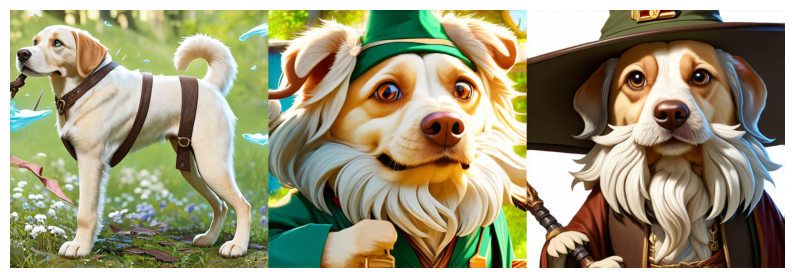

In [ ]:
generated_images = [
    image_to_image.generate(
        {
            "images": image_array,
            "prompts": prompt,
        },
        strength=0.7,
    ),
    image_to_image.generate(
        {
            "images": image_array,
            "prompts": prompt,
        },
        strength=0.8,
    ),
    image_to_image.generate(
        {
            "images": image_array,
            "prompts": prompt,
        },
        strength=0.9,
    ),
]
display_generated_images(generated_images)

## Inpaint task

Building upon the image-to-image task, we can also control the generated area
using a mask. This process is called inpainting, where specific areas of an
image are replaced or edited.

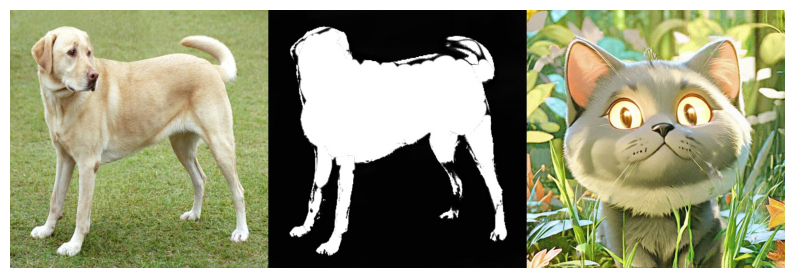

In [ ]:
inpaint = keras_hub.models.StableDiffusion3Inpaint(backbone, preprocessor)

image = Image.open("/content/YellowLabradorLooking_new.jpg").convert("RGB")
image = image.resize((512, 512))
image_array = rescale(np.array(image))

# Note that the mask values are of boolean dtype.
mask = Image.open("/content/11.jpg").convert("L")
mask = mask.resize((512, 512))
mask_array = np.array(mask).astype("bool")

prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly "
prompt += "detailed, 8k"

generated_image = inpaint.generate(
    {
        "images": image_array,
        "masks": mask_array,
        "prompts": prompt,
    }
)
display_generated_images(
    [
        np.array(image),
        np.array(mask.convert("RGB")),
        generated_image,
    ]
)